# Logistic Regression

## Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split , cross_val_score
from sklearn.metrics import confusion_matrix , classification_report
from sklearn.metrics import precision_score , recall_score , f1_score
from sklearn.metrics import plot_roc_curve

# Load data

In [2]:
df = pd.read_csv("heart-disease.csv") # Heart-disease
df.shape 

(303, 14)

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
 # let's find out how many of each class there  
df["target"].value_counts()    

1    165
0    138
Name: target, dtype: int64

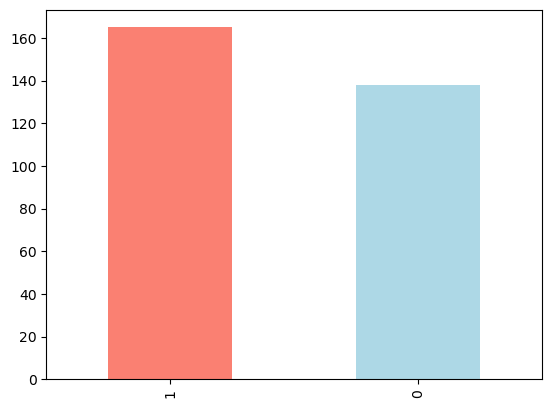

In [6]:
df["target"].value_counts().plot(kind="bar" , color=["salmon" , "lightblue"]);

In [7]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [8]:
pd.crosstab(df["target"] , df["sex"])

sex,0,1
target,,
0,24,114
1,72,93


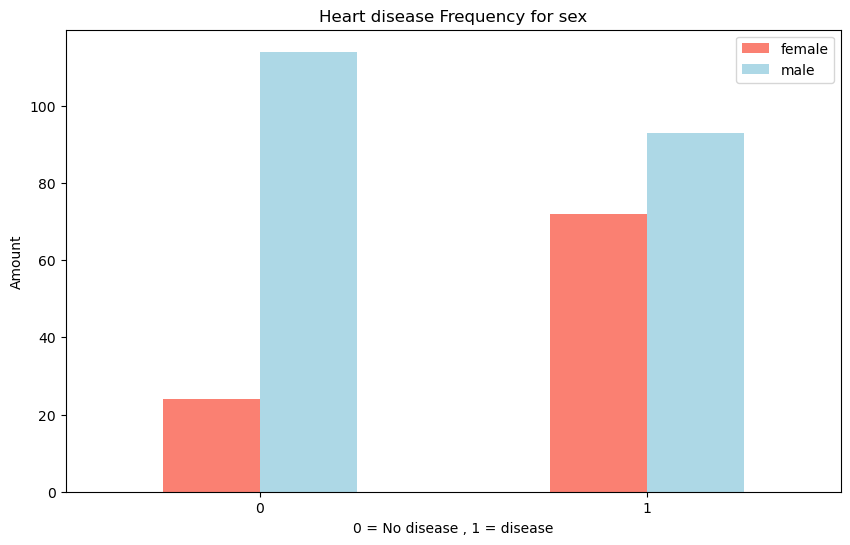

In [9]:
pd.crosstab(df.target , df.sex).plot(kind="bar" , figsize=(10,6),
                                      color=["salmon" , "lightblue"])
plt.title("Heart disease Frequency for sex")
plt.xlabel("0 = No disease , 1 = disease")
plt.ylabel("Amount")
plt.legend(["female" , "male"])
plt.xticks(rotation =0);


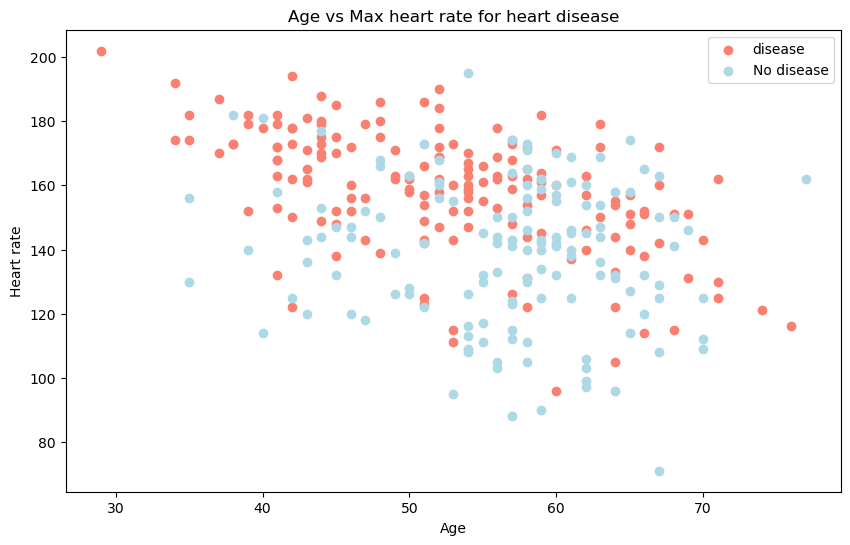

In [10]:
plt.figure(figsize=(10,6))

plt.scatter(df.age[df.target == 1] , df.thalach[df.target==1], color="salmon")

plt.scatter(df.age[df.target == 0] , df.thalach[df.target==0], color="lightblue")

plt.xlabel("Age")
plt.ylabel("Heart rate")
plt.title("Age vs Max heart rate for heart disease")
plt.legend(["disease" , "No disease"]);


<AxesSubplot:ylabel='Frequency'>

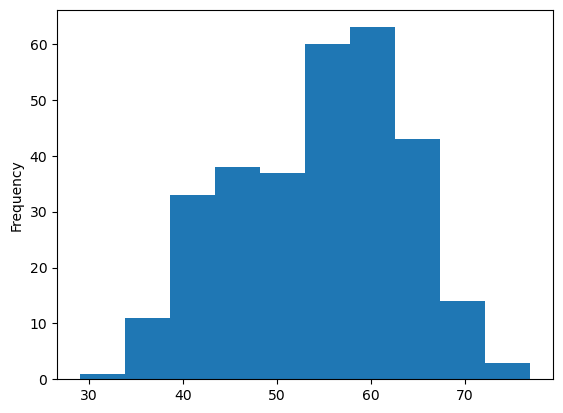

In [11]:
df.age.plot.hist()

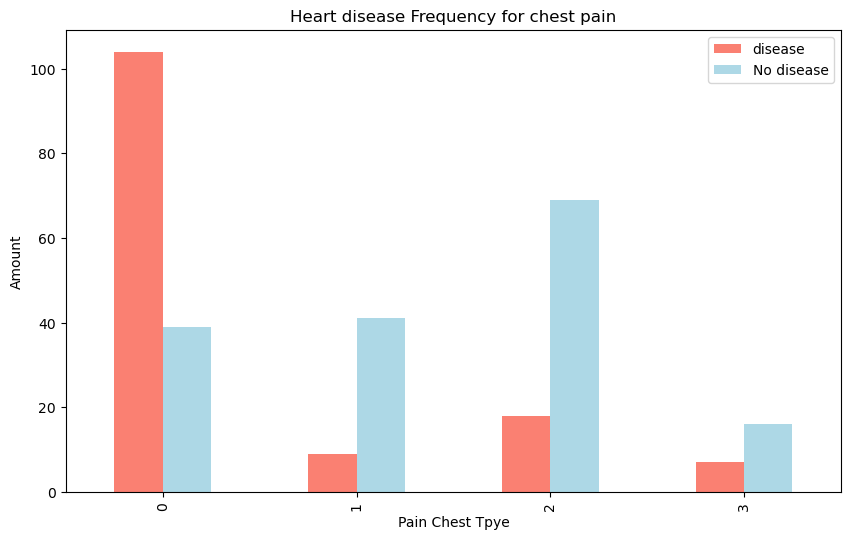

In [12]:
pd.crosstab( df.cp ,df.target).plot(kind="bar", color=["salmon","lightblue"] , figsize=(10,6))

plt.xlabel("Pain Chest Tpye")
plt.ylabel("Amount")
plt.title("Heart disease Frequency for chest pain")
plt.legend(["disease" , "No disease"]);

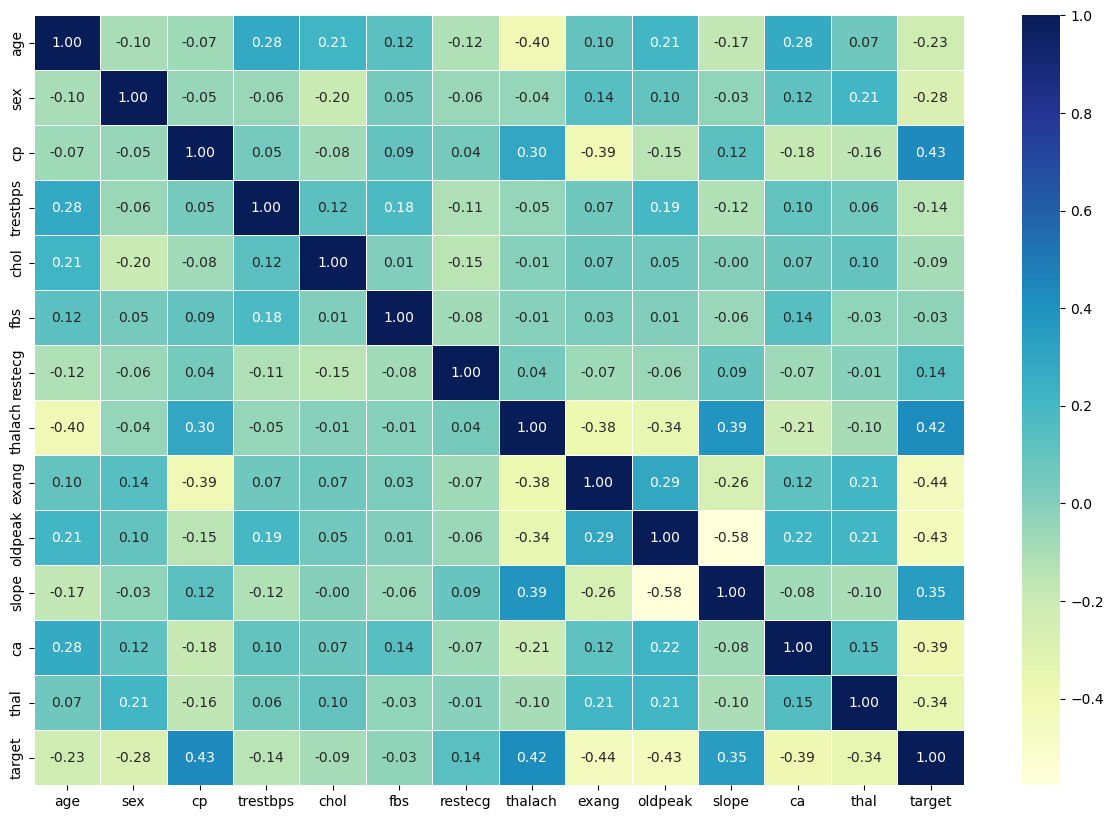

In [13]:
import seaborn as sns
# correlation in value 

matrix_corr = df.corr()fig , ax = plt.subplots(figsize=(15,10))

ax = sns.heatmap(matrix_corr , annot = True ,linewidths = 0.5,fmt = ".2f",cmap = "YlGnBu")


#  Modelling

In [14]:
x = df.drop("target" , axis = 1)
y = df["target"]

In [15]:
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [16]:
# split data into train and test
np.random.seed(42)

# split into train and test 
x_train , x_test , y_train , y_test = train_test_split(x,y , test_size=0.2)

In [17]:
x_train , len(x_train)

(     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
 132   42    1   1       120   295    0        1      162      0      0.0   
 202   58    1   0       150   270    0        0      111      1      0.8   
 196   46    1   2       150   231    0        1      147      0      3.6   
 75    55    0   1       135   250    0        0      161      0      1.4   
 176   60    1   0       117   230    1        1      160      1      1.4   
 ..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
 188   50    1   2       140   233    0        1      163      0      0.6   
 71    51    1   2        94   227    0        1      154      1      0.0   
 106   69    1   3       160   234    1        0      131      0      0.1   
 270   46    1   0       120   249    0        0      144      0      0.8   
 102   63    0   1       140   195    0        1      179      0      0.0   
 
      slope  ca  thal  
 132      2   0     2  
 202      2   0     3  
 1

In [18]:
model = LogisticRegression(max_iter = 120)
model.fit(x_train , y_train)

/home/ankush/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=120)

In [19]:
model_scores = model.score(x_test , y_test)
model_scores

0.8688524590163934

In [20]:
y_preds = model.predict(x_test)       

In [21]:
y_preds


array([0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [23]:
print(confusion_matrix(y_test , y_test))

[[29  0]
 [ 0 32]]


Text(-4.249999999999998, 0.5, 'Predicted label')

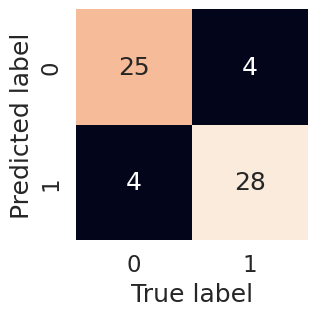

In [24]:
sns.set(font_scale=1.5)

fig , ax = plt.subplots(figsize=(3,3))

ax = sns.heatmap(confusion_matrix(y_test , y_preds) , 
                annot=True,
                cbar= False)
plt.xlabel("True label")
plt.ylabel("Predicted label")

In [25]:
print(classification_report(y_test , y_preds))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86        29
           1       0.88      0.88      0.88        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61

